## Исследование данных о российском кинопрокате



Заказчик — Министерство культуры Российской Федерации.
Нужно поисследовать рынок российского кинопроката и найти закономерности интересные и/или тренды. Особенно стоит поизучать фильмы, которые получили господдержку. Следует понять, насколько хорошо или не очень фильмы с господдержкой оцениваются зрителями.

У нас есть 2 таблицы с разными данными. Датасет с общими данными о прокатных фильмах и второй датасет с прокатным данными в россии.
Датасеты содержат информацию о прокатных удостоверениях, названиях, режисерах, жанрах, сборах и господдержке фильмов, а также информацию с сайта КиноПоиск и т.д.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [504]:
data1 = pd.read_csv('mkrf_movies.csv')
# display(data1.head())
display(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

In [505]:
data2 = pd.read_csv('mkrf_shows.csv')
# display(data2.head())
display(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

В первом датафрейме колонка "puNumber" находится в строковом формате, а во 2ом датафрейме - целочисленный тип данных. Раз это уникальный номер, то есть категориальная переменная (вряд ли мы с ней будем какие-то вычисления делать), то преобразуем колонку "puNumber" во втором датафрейме в тип строки и объединим по нему оба датафрейма в один.

In [506]:
# меняем тип данныхв столбце puNumber в data2 на строковый, как и data1
data2['puNumber'] = data2['puNumber'].astype('str')

data = data1.merge(data2, on='puNumber', how='left')

#display(data.head())

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [507]:
# title — название фильма;
# puNumber — номер прокатного удостоверения;
# show_start_date — дата премьеры фильма;
# type — тип фильма;
# film_studio — студия-производитель;
# production_country — страна-производитель;
# director — режиссёр;
# producer — продюсер;
# age_restriction — возрастная категория;
# refundable_support — объём возвратных средств государственной поддержки;
# nonrefundable_support — объём невозвратных средств государственной поддержки;
# financing_source — источник государственного финансирования;
# budget — общий бюджет фильма;
# ratings — рейтинг фильма на КиноПоиске;
# genres — жанр фильма.

In [508]:
display(data.info())
# display(data['ratings'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

Точно необходимо изменить тип данных у ratings на float, show_start_date в формат даты.

In [509]:
sorted_data = data.sort_values(by='ratings')
display(sorted_data['ratings'].unique())


# display(data.info())

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

В колонке ratings есть значения,которые указаны через %. Соотвественно преобразовать все значения в тип float не можем, пока не приведем все к какой-то однородности. Уберем процент, а затем эти же значения разделим на 10 и будем считать, что сделали % (100балльного) рейтинга эквивалентный ему 10 балльный рейтинг

In [510]:
def remake_ratings(rating):
    if rating != 'nan':
        if str(rating)[-1] == '%':
            rating = float(str(rating)[:-1]) / 10
            return rating
        else:
            return float(rating)

data['ratings'] = data['ratings'].apply(remake_ratings)
# display(data['ratings'])

# sorted_data = data.sort_values(by='ratings')
# display(sorted_data['ratings'].unique())


Преобразуем в более человеческий вид данные в столбце show_start_date

In [511]:
# display(data['show_start_date'].head(15))
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')
# display(data['show_start_date'].head(15))

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Для упрощения дальнейшей "жизни" заменили пропуски у столбцов director и genres на понятную строковую характеристику. В дальнейшем будет проще применить функции к соотвествующим столбцам.

In [512]:
data.info()
# data = data.dropna().reset_index(drop=True)
data.fillna({'director':'Отсутствует режиссёр', 'genres':'Отсутствует жанр', 
             'producer':'Отсутствует продюсер',  'production_country':'Отсутствует страна'}, inplace=True)
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4328
dtype: int64

Заполнил пропуски в трех категориях, но ощущение, что это не пригодится особо даже. Остались пропуски с такими категорями, как студия, страна, всё что связано с бюджетом, рейтинг и сборы в рублях. Думаю это будет неправильно заполнять пропуски в категориях связанных с бюджетом какимто число, будь то среднее или медианное. Такое дейсвтие может сильно искозить данные по тем фильмам, что у нас есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [513]:
# display(data['title'].value_counts())

def clean_title(title):
    title = title.strip(' _!.,')
    return title #.capitalize()
data['title'] = data['title'].apply(clean_title)

# data['title'] = data['title'].drop_duplicates()
# data = data.dropna(subset=['title']).reset_index(drop=True)
data = data.drop_duplicates(subset=['title', 'show_start_date', 'box_office', 
                                    'director', 'production_country', 'producer',
                                   'puNumber'], keep='first')
data = data.dropna(subset=['title']).reset_index(drop=True)

# display(len(data['title'].unique()))
# display(data['title'].value_counts())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Обнаружил, что в категории title есть дубликаты, особенно, если убрать "мусор". Некоторые названия оканчивались на рандомные знаки "!, _, ." и т.п. Пришлось написать минифункцию, которая убрала бы этот мусор. И удалил все появившиеся дубли. Подобный мусор скорее всего появился из-за человеческого фактора, кто-то неумышленно надобавлял случайные знаки, также, возможно, при выгрузке данных произошел какой-то сбой или может кто-то специально нашкодил. Плюс неизвестно каким образом были собраны данные, некоторые названия похожи были на "любительское" заполнение, с отражением личных эмоций к фильму.

P.S. через str.strip(..) почему-то не получилось.

Теперь расмотрим категорию puNumber.

In [514]:
display(data['puNumber'].value_counts())
display(len(data['puNumber'].unique()))
data['puNumber'] = data['puNumber'].drop_duplicates()
display(data['puNumber'].value_counts())
display(len(data['puNumber'].unique()))
# data.info()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

7484

221048915    1
124000611    1
121014511    1
121014411    1
121015211    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: puNumber, Length: 7484, dtype: int64

7485

В категории puNumber дубликатов не обнаружилось.
В общей сложности удалено 8 строк (дублей).

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [515]:
# title — название фильма;
# puNumber — номер прокатного удостоверения;
# show_start_date — дата премьеры фильма;
# type — тип фильма;
# film_studio — студия-производитель;
# production_country — страна-производитель;
# director — режиссёр;
# producer — продюсер;
# age_restriction — возрастная категория;
# refundable_support — объём возвратных средств государственной поддержки;
# nonrefundable_support — объём невозвратных средств государственной поддержки;
# financing_source — источник государственного финансирования;
# budget — общий бюджет фильма;
# ratings — рейтинг фильма на КиноПоиске;
# genres — жанр фильма.

In [516]:
# display(len(data['type'].unique()))
data['type'] = data['type'].str.strip()
# display(len(data['type'].unique()))

# display(len(data['film_studio'].unique()))
data['film_studio'] = data['film_studio'].str.strip()
# display(len(data['film_studio'].unique()))
# display(data['film_studio'].unique())

# display(len(data['production_country'].unique()))
data['production_country'] = data['production_country'].str.strip()
display(len(data['production_country'].unique()))
# display(data['production_country'].unique())
# display(data['production_country'].value_counts()[:30])

def good_country(country):
    if ',' in country:
        new_c = country.split(',')
        new_c = list(map(lambda x: x.strip(), new_c))
        return ', '. join(sorted(new_c))
    elif '-' in country:
        new_c = country.split('-')
        new_c = list(map(lambda x: x.strip(), new_c))
        return ', '. join(sorted(new_c))
    else:
        return country

data['production_country'] = data['production_country'].apply(good_country)
display(len(data['production_country'].unique()))
# display(data['production_country'].unique())
# display(data['production_country'].value_counts()[:30])

# display(len(data['title'].unique()))
# data['title'] = data['title'].str.strip()
# display(data['title'].unique())

# display(len(data['puNumber'].unique()))
# data['puNumber'] = data['puNumber'].str.strip()
# display(len(data['puNumber'].unique()))

# display(len(data['age_restriction'].unique()))
# data['age_restriction'] = data['age_restriction'].str.strip()
# display(len(data['age_restriction'].unique()))

935

676

Решил проверить все категориальные значения, на наличие "лишних" пробелов, получилось что такая проблема есть в трех категориях: тип фильма; студия-производитель; страна-производитель. Во всех категориях "поубирал" эти лишние пробелы. В общем и целом, появиться эти пробелы могли по тем же причинам, что и мусор в категории title.

Так же была обнаружена проблема в "страна-производитель", данные были записаны в разброс и где-то через "-", где-то через "," и т.д. Написал функцию, чтобы привести их к одному общему виду - весь список стран, имевших отношение к созданию фильма, и для удобства остортированных по алфавиту. 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [517]:
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,6.488173,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,1.114638,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


In [518]:
display(data.loc[data['refundable_support'] + data['nonrefundable_support'] >= data['budget']]['budget'].count())

17

Обнаружил, что есть 17 фильмов, у которых общий бюджет меньше, чем сумма возвратных и невозвратных средств из госбюджета. Такой факт невозможен. Поэтому удалим, пожалуй, строки, где есть информация о возвр/невозвр средствах, но общий бюджет нулевой.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [519]:
data['start_year'] = pd.DatetimeIndex(data['show_start_date']).year
# display(data['show_start_date'].head(15))
# display(data['start_year'].head(15))

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

После мини исследования обнаружилось, что режиссеры записаны по разному: где-то списком через запятую, где-то фио полностью через пробел, где-то ИФ и через пробел в скобках пояснение и т.д., поэтому написал функцию, которая из всего столбца вытаскивает только первого режиссера.

Почти аналогичная ситуация с жанрами. Написал отдельную функцию, которая вытаскивает только первый жанр из списка

In [520]:
# создаём функцию, которая создаёт новый столбец с ФИО первого режиссёра

# display(data['director'].head(15))
#display(data['director'].unique().tolist())
# display(data['director'].value_counts())

def first_director(director):
    if ', ' in director:
        return director.split(', ')[0]
    else:
        return director

data['first_director'] = data['director'].apply(first_director)
#display(data['first_director'].unique().tolist())
# display(data['first_director'].unique())
# display(data['first_director'].value_counts())
# display(data['first_director'].head(15))
# display(data['first_director'].unique())

In [521]:
# создаём функцию, которая создаёт новый столбец с гланвым жанром

# display(data['genres'].head(15))
# display(data['genres'].unique())

def main_genre(genres):
    genre_m = genres.split(',')
    return genre_m[0]

data['main_genre'] = data['genres'].apply(main_genre)
# display(data['main_genre'].head(15))
# display(data['main_genre'].unique())

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [522]:
all_support = data['refundable_support'].sum() + data['nonrefundable_support'].sum()
govsup_part = round((all_support / data['budget'].sum() * 100), 2)
display(all_support)
display(govsup_part)

20200688312.0

47.82

Таким образом, доля господдержки от общего бюджета составляет примрено 47%. То есть грубо говоря все фильмы в РФ созданы на половину благодаря госбюджету.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,title,box_office,part_of_box_office
start_year,,,
2010,985,105,10.66
2011,622,109,17.52
2012,593,128,21.59
2013,630,184,29.21
2014,807,279,34.57
2015,705,465,65.96
2016,818,526,64.30
2017,505,357,70.69
2018,891,475,53.31


<AxesSubplot:title={'center':'Part of box office per year'}, xlabel='start_year'>

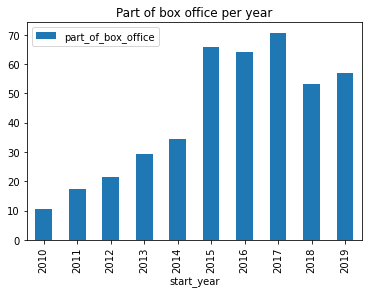

In [523]:
# Создадим отдельную табличку по годам
data_by_year = data.groupby('start_year')[['title', 'box_office']].count()
data_by_year['part_of_box_office'] = round((data_by_year['box_office'] / data_by_year['title'] * 100), 2)
display(data_by_year)
data_by_year.plot(y='part_of_box_office', kind='bar', title='Part of box office per year')

Можно заметить, что с годами доля фильмов, вышедших в прокат в РФ от общего количества фильмов в тот же год, достаточно увеличилась. За 9 лет с 11,6% до почти 59%. При этом, не смотря на то, что общее количество выпускаемых фильмов в мире в какие-то года "проседало" (например, 2017 год - всего 490 фильмов), то доля фильмов, вышедших в прокат в РФ в тот же год, наоборот была максимальной.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
start_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


2428654.0

49668403134.32

20451.0

<AxesSubplot:title={'center':'Box office per year'}, xlabel='start_year'>

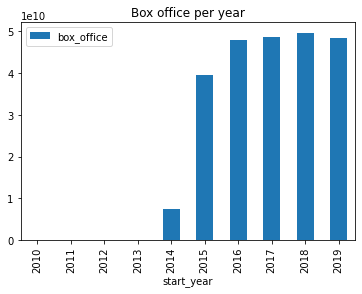

In [524]:
data_by_year_box_office = data.groupby('start_year')[['box_office']].sum()

display(data_by_year_box_office)
display(data_by_year_box_office['box_office'].min())
display(data_by_year_box_office['box_office'].max())
display(round((data_by_year_box_office['box_office'].max() / data_by_year_box_office['box_office'].min()), 2))
data_by_year_box_office.plot(y='box_office', kind='bar', title='Box office per year')

В среднем, можно сказать, что динамика проката по годам - положительная, не идеально возрастающая, но положительная. Сумма сборов по сравнению с 2010 годом в 2019 году увеличилась в 22 500+ раз. В 2010 году была самая минимальная сумма сборов - 2млн+ рублей, а в 2019 уже 4,76млрд+.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


<AxesSubplot:title={'center':'Median box office per year'}, xlabel='start_year'>

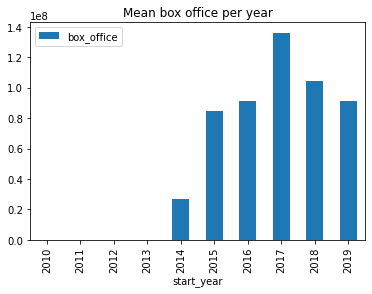

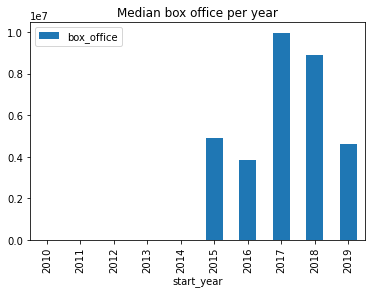

In [525]:
data_by_year_box_office_2 = data.pivot_table(index='start_year', values='box_office', aggfunc=['mean','median']) 
display(data_by_year_box_office_2)
# data_by_year_box_office_2.rename(columns = {'box_office' : 'lala'}, inplace = True)
# display(data_by_year_box_office_2)


data_by_year_box_office_2.plot(y='mean', kind='bar', title='Mean box office per year')
data_by_year_box_office_2.plot(y='median', kind='bar', title='Median box office per year')

2017 год, что по медианному срезу, что по среднему - был самый прибыльный год по сумме сборов в рублях.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

<AxesSubplot:title={'center':'«18+»'}, xlabel='start_year'>

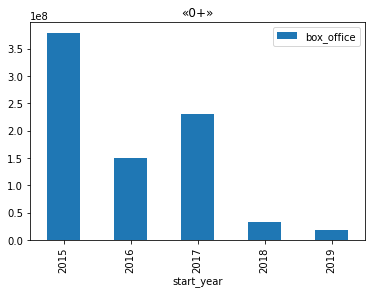

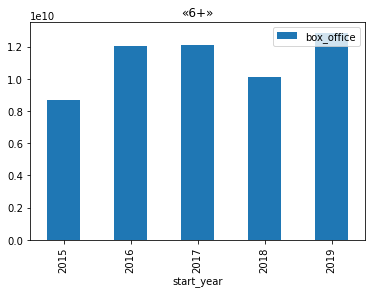

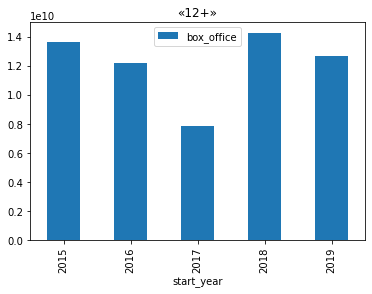

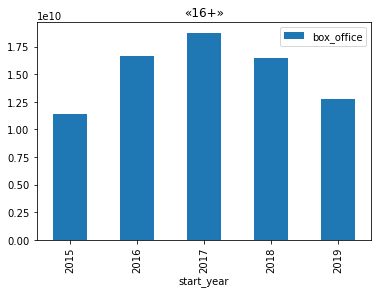

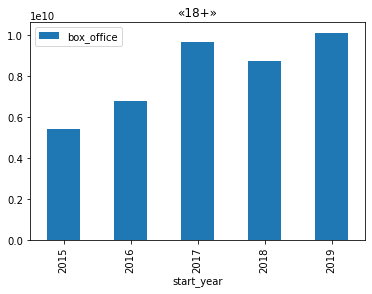

In [526]:
# def age_filter()
display(data['age_restriction'].unique())

box_oddice_age0 = (
    data.query('age_restriction == "«0+» - для любой зрительской аудитории" and 2015<= start_year <= 2019')
    .pivot_table(index='start_year', values='box_office', aggfunc='sum')
)
box_oddice_age0.plot(y='box_office', kind='bar', title='«0+»')

box_oddice_age6 = (
    data.query('age_restriction == "«6+» - для детей старше 6 лет" and 2015<= start_year <= 2019')
    .pivot_table(index='start_year', values='box_office', aggfunc='sum')
)
box_oddice_age6.plot(y='box_office', kind='bar', title='«6+»')

box_oddice_age12 = (
    data.query('age_restriction == "«12+» - для детей старше 12 лет" and 2015<= start_year <= 2019')
    .pivot_table(index='start_year', values='box_office', aggfunc='sum')
)
box_oddice_age12.plot(y='box_office', kind='bar', title='«12+»')

box_oddice_age16 = (
    data.query('age_restriction == "«16+» - для детей старше 16 лет" and 2015<= start_year <= 2019')
    .pivot_table(index='start_year', values='box_office', aggfunc='sum')
)
box_oddice_age16.plot(y='box_office', kind='bar', title='«16+»')

box_oddice_age18 = (
    data.query('age_restriction == "«18+» - запрещено для детей" and 2015<= start_year <= 2019')
    .pivot_table(index='start_year', values='box_office', aggfunc='sum')
)
box_oddice_age18.plot(y='box_office', kind='bar', title='«18+»')

,box_office
ageres,
0,1.205004e+09
6,5.753073e+10
12,6.322559e+10
16,7.658367e+10
18,4.297473e+10


<AxesSubplot:xlabel='ageres'>

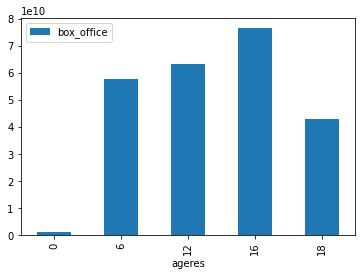

In [527]:
data['ageres'] = data['age_restriction']
def abc(stroka):
    stroka = stroka.split()
    if stroka[0] == '«0+»':
        return 0
    elif stroka[0] == '«6+»':
        return 6
    elif stroka[0] == '«12+»':
        return 12
    elif stroka[0] == '«16+»':
        return 16
    else:
        return 18
data['ageres'] = data['ageres'].apply(abc)  

data_by_ageres = data.groupby('ageres')[['box_office']].sum()
display(data_by_ageres)

data_by_ageres.plot(y='box_office', kind='bar')

Исходя из полученных гистограм и если говорить шутя, то в последние годы (18-19) "мультики" (фильмы 0+), крайне непопулряны и неприбыльны по общему количеству сборов. 

Фильмы 0+ почти на 2 порядка получили меньше сборов, чем другие категории за 2015-2019гг. И в 18, 19 годах в целом "упали" по количеству сборов с проката. У категории 6+ относительно все стабильно за тот же период времени. У категории 12+ в 2017 году была просадка  в 2 раза почти по количеству сборов по сравнению с другими годами. Возможно так совпало, что в этот год больше выпускался контент 6+ и 16+, поэтому у 12+ просадка. Ну, а сборы 18+ стабильно растут, кто бы сомневался. Вердикт - есть смысл выпускать фильмы 12+ и 16, потому что по фильмам этих категорий больше всего сборов сумарно. 

Есть предположение, чем обусловлен такой противоречивый 2017 год, когда категория 12+ явно пострадала, а категории 6+ и 16+ наоборот сделали свой пик - это выход популярных фильмов в этот год, по типу звездных войнов, стражей галактики, бегущий по лезвию, ла-лаленд и другие. Возможно аткеи фильмы и были ориентирвоаны только на 6+ и 16+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [528]:
# title — название фильма;
# puNumber — номер прокатного удостоверения;
# show_start_date — дата премьеры фильма;
# type — тип фильма;
# film_studio — студия-производитель;
# production_country — страна-производитель;
# director — режиссёр;
# producer — продюсер;
# age_restriction — возрастная категория;
# refundable_support — объём возвратных средств государственной поддержки;
# nonrefundable_support — объём невозвратных средств государственной поддержки;
# financing_source — источник государственного финансирования;
# budget — общий бюджет фильма;
# ratings — рейтинг фильма на КиноПоиске;
# genres — жанр фильма.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1870 to 7464
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  91 non-null     object 
 1   puNumber               91 non-null     object 
 2   refundable_support     91 non-null     float64
 3   nonrefundable_support  91 non-null     float64
 4   budget                 91 non-null     float64
 5   ratings                88 non-null     float64
 6   box_office             91 non-null     float64
 7   start_year             91 non-null     int64  
 8   main_genre             91 non-null     object 
 9   first_director         91 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 7.8+ KB


None

'Всего выделено средств из госбюджета 8718028548.0'

'Окупаемость за всё время 13.842%'

'Окупаемость за всё время 2 -43.55%'

60000000.0

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

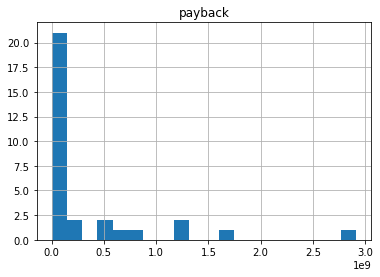

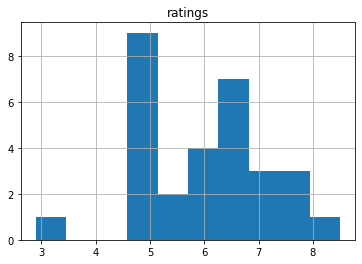

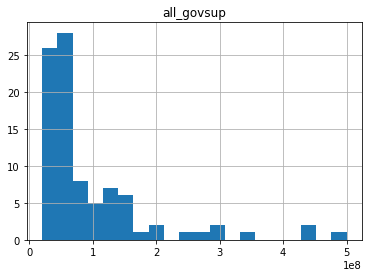

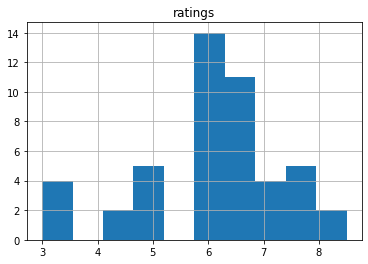

In [529]:
# Создаём отдельный датафрейм, где известны и положительны все значения, касаемые денег.
data_govsup = (
    data.query(('refundable_support > 0 and nonrefundable_support > 0 and box_office > 0 and budget > 0'))
)
data_govsup = data_govsup[
    ['title', 'puNumber', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 
     'box_office', 'start_year', 'main_genre', 'first_director']
]
display(data_govsup.info())
# Посчитаем общее количество выделенного бюджета и общую окупаемость
govsup_all = data_govsup['refundable_support'].sum() + data_govsup['nonrefundable_support'].sum()
a1 = 'Всего выделено средств из госбюджета ' + str(govsup_all)
display(a1)
govsup_per_budget = govsup_all / data_govsup['budget'].sum()
payback_total = data_govsup['box_office'].sum() / data_govsup['budget'].sum()
a2 = 'Окупаемость за всё время ' + str(round((payback_total - 1) * 100, 3)) + "%"
display(a2)
# Посчитаем окупаемость по медианным значениям
c = data_govsup['box_office'].median() / data_govsup['budget'].median()
cc = 'Окупаемость за всё время 2 ' + str(round((c - 1) * 100, 3)) + "%"
display(cc)

# Найдём медианное значение по выделяемому госбюджету
data_govsup['all_govsup'] = data_govsup['refundable_support'] + data_govsup['nonrefundable_support']
display(data_govsup['all_govsup'].median())

# Найдём окупаемость по каждому фильму и выделим отдельные датафреймы, где окупаемость больше 0 и где господдержка выше медианной
data_govsup['payback'] = data_govsup['box_office'] - data_govsup['budget']
data_govsup_top_payback = data_govsup.loc[data_govsup['payback'] > 0]
data_govsup_top_govsup = data_govsup.loc[data_govsup['all_govsup'] >= 60000000]

# Построим гистограмки по разным показателям, чтобы увидеть расприделение по каждому показателю
data_govsup_top_payback.hist('payback', bins=20)
data_govsup_top_payback.hist('ratings', bins=10)

data_govsup.hist('all_govsup', bins=20)
data_govsup_top_govsup.hist('ratings', bins=10)



За все время датафрейма (2010-2019 гг) из госбюджета на киномотограф было выделено 8,25 млрд рублей. Стоит учитывать, что был рассмотрен крайне маленький датафремй в виде 89 фильмов из 7000+ первоначальных (рф и не рф фильмов). По огромному количеству фильмов была неполная информация либо по возвр/невозвр госбюджету, общему бюджету или прибыли с проката. Возможно стоит пропуски в подобных столбцах на что-то заменить, дабы увеличить последний датафрейм.

Но исходя из получившегося датафрейма можно сделать дополнительно следующие вывод: общая окупаемость за все года 89-и фильмов составила 10,6%, но если рассчитывать ту же окупаемость но по медианным значениям, то показатель резко падает до -43,5%. То есть если смотреть в медианном разрезе на российский кинематограф, то с 2010-2019гг не очень то и выгодно было снимать и показывать фильмы))

Также были построены гистограммы, по которым видно, что почти у 90% фильмов, у которых была хоть какая-то окупаемость - она составляет до 500млн рублей. Гистограмма по рейтингу таких фильмов выдаёт два пика: первый это с рейтингом в промежутке 4,5-5 звезд, а второй 6,3-6,8 звезд. 

Так же у 90% фильмов господдержка составляла не более 100млн рублей. А если смотреть на рейтинг фильмов, чья господдержка была выше медианного значения в 60млн рублей, то есть основной пик в промежутке 5,8 - 6,5 звезд.

0.2680437752034798

0.23487365844473573

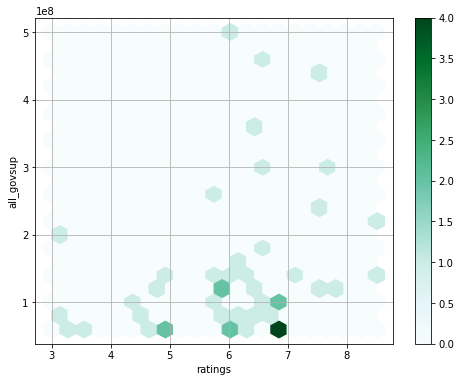

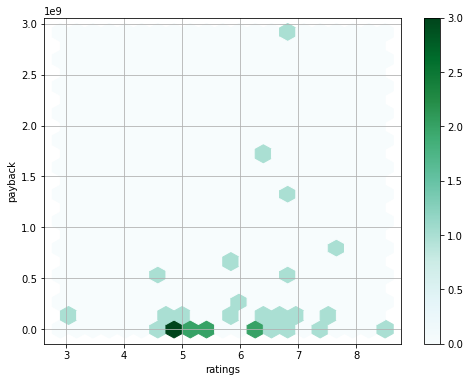

In [530]:
data_govsup_top_govsup.plot(x='ratings', y='all_govsup', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
display(data_govsup_top_govsup['ratings'].corr(data_govsup_top_govsup['all_govsup']))

data_govsup_top_payback.plot(x='ratings', y='payback', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
display(data_govsup_top_payback['ratings'].corr(data_govsup_top_payback['payback']))


Также были построены 2 тепловые диаграммы:

Первая пытается показать зависимость рейтинга и господдержки, и судя по значению корреляции, то зависимость крайне слабая, тем не менее можно отметить тот факт, что большое количество фильмов с господдержкой близкой и чуть выше медианной оценились зрителями почти на 7 звезд.

Вторая тепловая диаграмка так же пытается показать зависимость между окупаемостью и рейтингом. Опять же исходя из коэффициента корреляции, зависимости как таковой не наблюдается, но так же можно выделить, что подавляющее большинство фильмов это фильмы с нулевой-близнулевой окупаемостью и рейтингом в 5 звезд с натяжкой.

In [531]:
display(data_govsup['main_genre'].value_counts())
display(data_govsup['first_director'].value_counts())

display(data['main_genre'].value_counts())
display(data['first_director'].value_counts())

комедия             22
драма               17
мультфильм          12
триллер              6
фэнтези              5
ужасы                5
мюзикл               4
Отсутствует жанр     3
криминал             3
военный              2
семейный             2
приключения          2
фантастика           2
детектив             2
история              2
боевик               1
реальное ТВ          1
Name: main_genre, dtype: int64

Д.Дьяченко       4
А.Цицилин        3
Д.Киселев        2
А.Матисон        2
С.Подгаевский    2
                ..
П.Лунгин         1
Ю.Васильев       1
А.Соколов        1
Н.Бондарчук      1
А.Кравчук        1
Name: first_director, Length: 80, dtype: int64

драма               1688
Отсутствует жанр     976
комедия              697
боевик               617
ужасы                573
мультфильм           538
триллер              521
фантастика           410
мелодрама            383
фэнтези              358
документальный       219
аниме                 74
мюзикл                64
детектив              56
приключения           55
военный               46
криминал              39
биография             33
семейный              32
детский               28
история               26
короткометражка       13
концерт               12
спорт                  9
вестерн                7
музыка                 7
для взрослых           3
фильм-нуар             1
реальное ТВ            1
Name: main_genre, dtype: int64

О.Семёнова          47
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Вильям Де Витал      1
А.Дамскер            1
Брэдли Кинг          1
Акош Барноцкий       1
И.Трусов             1
Name: first_director, Length: 4613, dtype: int64

Так же можно отметить, что среди фильмов, у которых рассматривались закономерности между рейтингом и выделенным бюджетом в топ 3 просматриваемых жанров входят: комедия, драма, мультфильм. И топ-3 режиссера: Дьяченко, Цицилин, Кисилёвю А если по всему первоначальному датафрейму, то топ 3 седи зарубежного и отечественного кино это драма, комедия, боевик и топ3 режиссера: Семёнова, Червяцов и Вуди Аллен.

### Шаг 5. Напишите общий вывод

В ходе исследовани определили, что самамыми "прокатными годами были 2019, 2018 и 2016,  а самым непрокатным - 2011 год. Увеличилась доля показываемых фильмов в РФ от общего количества вышедших фильмов почти в 4,5 раз за период с 2011 по 2019гг.

Так же можно наблюдать неидеальный рост сумм сборов в каждый год с 2011 по 2019гг, но при этом разница сборов в 2011 и 2019гг возросла в 22500 раз. 

Самыми просматриваемыми категориями являются фильмы с ограничениями "16+".

Так же был дополнительно проведен исследовательский анализ среди фильмов, которые получали господдержку: доход
90% фильмов, что хоть как-то вышли в плюс, лежит в диапазоне от 0 до 500млн рублей. И рейтинг таких фильмов в большинстве случаев не превышает 5 звезд.

Прямой и явной зависимости от наличия и величины господдержки с рейтингом фильма не обнаружилось